<center><h1>TASK 3 LetsGrowMore</h1></center>
<center><h1>Task#3 : Stock Market Prediction And Forecasting Using Stacked LSTM</h1></center>
<center><h2 style="color: red ;background-color:pink;" > LetsGrowMore <br>
LGMVIP- JULY_2023 Data Science<br> By : Ayesha Nazir Butt </h2></center>


 1) *Importing necessary Libraries*

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

 2) *Data *Preprocessing**

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")

In [3]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [5]:
df.isnull().sum()


Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>,
        <Axes: title={'center': 'Low'}>],
       [<Axes: title={'center': 'Last'}>,
        <Axes: title={'center': 'Close'}>,
        <Axes: title={'center': 'Total Trade Quantity'}>],
       [<Axes: title={'center': 'Turnover (Lacs)'}>, <Axes: >, <Axes: >]],
      dtype=object)

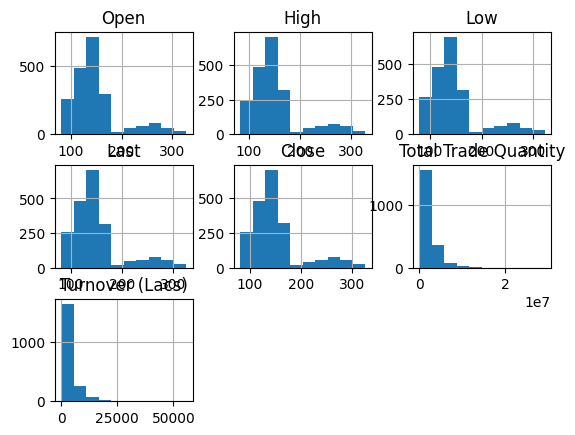

In [6]:
# Bar chart of dataset 
df.hist()

In [7]:
#show the overall of the dataset
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [8]:

#convert the 'Date' column to datetime format:
df['Date'] = pd.to_datetime(df['Date'])
#Sort the DataFrame based on the 'Date' column:
df = df.sort_values(by='Date')
#Display the head of the sorted DataFrame:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


  3) *Making Ordered Indexes*

In [9]:
df.reset_index(drop=True, inplace=True)
ordered_index = df.head()

In [10]:
#To check the ordered index, you can use df.head() as you mentioned. However, if you specifically want to assign the head of the DataFrame to a new variable for further analysis, you can use:

ordered_index = df.head()
ordered_index

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [11]:
max_value_column = df["Close"].max()
max_value_column

325.75

In [12]:
min_value_column = df["Close"].min()
min_value_column

80.95

4) *Plotting several types of Graphs of stocks at Close*

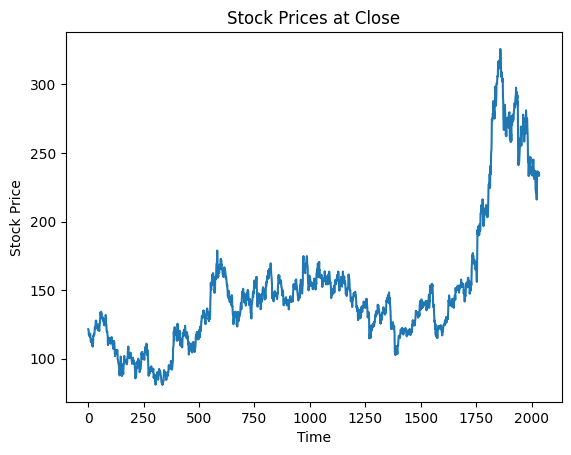

In [15]:
import matplotlib.pyplot as plt

plt.plot(df['Close'])
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Stock Prices at Close')
plt.show()


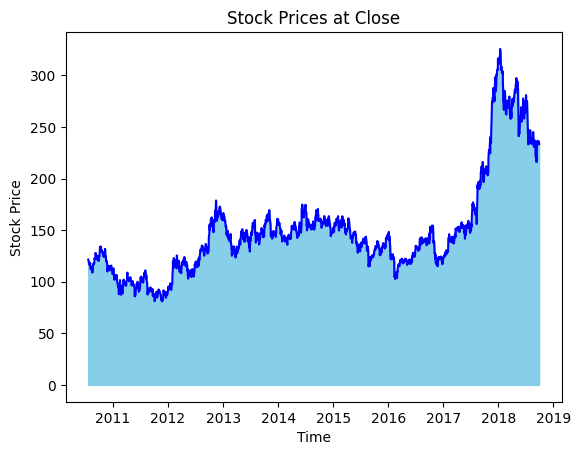

In [16]:
#Area chart:

plt.fill_between(df['Date'], df['Close'], color='skyblue')
plt.plot(df['Date'], df['Close'], color='blue')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Stock Prices at Close')
plt.show()



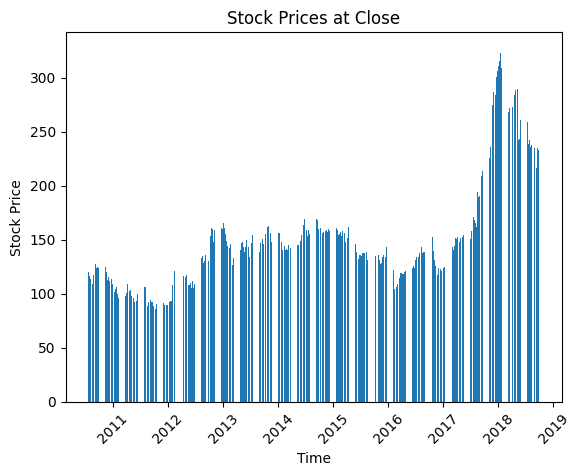

In [17]:
#Bar chart:
plt.bar(df['Date'], df['Close'])
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Stock Prices at Close')
plt.xticks(rotation=45)
plt.show()



In [18]:
df1 = df['Close']


5) *Feature Scaling*

In [25]:
scaler = MinMaxScaler(feature_range=(-1,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[-0.66830065],
       [-0.67361111],
       [-0.67565359],
       ...,
       [ 0.25245098],
       [ 0.24428105],
       [ 0.24836601]])

6) *Splitting the data into training and test sets*

In [29]:
# Splitting the data into training and test sets
training_size = int(len(df1) * 0.75)
test_size = len(df1) - training_size

train_data = df1[:training_size]
test_data = df1[training_size:]

print(training_size, test_size)



1526 509


In [31]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step)]
        dataX.append(a)
        dataY.append(dataset[i + time_step])
    return np.array(dataX), np.array(dataY)



In [30]:
time_step = 100

if len(train_data) >= time_step:
    X_train, y_train = create_dataset(train_data, time_step)
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
else:
    print("Insufficient data length for creating the training dataset.")

if len(test_data) >= time_step:
    X_test, y_test = create_dataset(test_data, time_step)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
else:
    print("Insufficient data length for creating the test dataset.")


7) *Build the LSTM model*

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [35]:
model= Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
model.fit(X_train, y_train, validation_split=0.1, epochs=60, batch_size=64, verbose=1)

Epoch 1/60
21/21 [==============================] - 6s 172ms/step - loss: 0.0799 - val_loss: 0.0061
Epoch 2/60
21/21 [==============================] - 3s 120ms/step - loss: 0.0077 - val_loss: 0.0028
Epoch 3/60
21/21 [==============================] - 2s 117ms/step - loss: 0.0047 - val_loss: 0.0027
Epoch 4/60
21/21 [==============================] - 3s 147ms/step - loss: 0.0032 - val_loss: 0.0023
Epoch 5/60
21/21 [==============================] - 3s 128ms/step - loss: 0.0031 - val_loss: 0.0026
Epoch 6/60
21/21 [==============================] - 3s 120ms/step - loss: 0.0036 - val_loss: 0.0046
Epoch 7/60
21/21 [==============================] - 3s 127ms/step - loss: 0.0035 - val_loss: 0.0021
Epoch 8/60
21/21 [==============================] - 3s 124ms/step - loss: 0.0029 - val_loss: 0.0022
Epoch 9/60
21/21 [==============================] - 3s 123ms/step - loss: 0.0033 - val_loss: 0.0019
Epoch 10/60
21/21 [==============================] - 3s 137ms/step - loss: 0.0029 - val_loss: 0.0018

In [41]:
#Prediction of scaled test set
test_predict = model.predict(X_test)

13/13 [==============================] - 0s 19ms/step


In [42]:
#transform to original test set
test_predict1 = scaler.inverse_transform(test_predict)

In [43]:
test_predict1

array([[138.19594],
       [141.98889],
       [144.1736 ],
       [145.84248],
       [146.33386],
       [145.98328],
       [144.80415],
       [143.28352],
       [141.44478],
       [140.26463],
       [139.94376],
       [140.63011],
       [141.77144],
       [142.47057],
       [142.50375],
       [142.07451],
       [141.32591],
       [141.9583 ],
       [142.74745],
       [143.8037 ],
       [144.694  ],
       [145.08253],
       [144.7246 ],
       [143.85895],
       [142.06363],
       [140.72879],
       [140.50197],
       [141.95168],
       [144.0267 ],
       [146.17378],
       [147.6187 ],
       [147.59172],
       [148.57886],
       [150.01501],
       [150.71173],
       [151.0961 ],
       [151.25934],
       [151.1755 ],
       [151.05678],
       [151.26334],
       [151.81766],
       [152.53986],
       [152.68094],
       [152.45921],
       [152.62674],
       [152.74576],
       [152.5142 ],
       [151.88841],
       [150.91281],
       [150.40935],


8) *Performance Metrics*


In [46]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn import metrics

# Reshape the test sets to match the shape of the predictions
y_test_reshaped = np.reshape(y_test, (y_test.shape[0], 1))

# Calculate and print additional performance metrics
mse = mean_squared_error(y_test_reshaped, test_predict)
mae = metrics.mean_absolute_error(y_test_reshaped, test_predict)
r2 = metrics.r2_score(y_test_reshaped, test_predict)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)


Mean Squared Error (MSE): 0.05288566097397326
Mean Absolute Error (MAE): 0.17087370061609086
R-squared (R2) Score: 0.7425220447687091



9) *Result Of Performance Metrics:*

-> *Mean Squared Error (MSE):*

The MSE value obtained is relatively low, indicating that the predicted values are close to the actual values. A low MSE suggests that the model's predictions are accurate on average.

-> *Mean Absolute Error (MAE):*

The MAE value represents the average absolute difference between the predicted values and the actual values. The obtained MAE value indicates that, on average, the model's predictions have an absolute difference of approximately 0.17 units from the actual values.

-> *R-squared (R2) Score:*

The R2 score is a measure of how well the model fits the data. The obtained R2 score of 0.742 suggests that the model explains approximately 74.2% of the variance in the target variable, which indicates a reasonably good fit.

Altogether, the model's performance based on the given performance metrics is promising. The low MSE indicates accurate predictions, the MAE suggests a relatively small average difference between predicted and actual values, and the R2 score indicates a good fit of the model to the data. 

<style>
/* Custom CSS for enhanced styling */
body {
  font-family: Arial, sans-serif;
  color: #333;
  background-color: #f7f7f7;
  margin: 20px;
}

h1 {
  color: #1f77b4;
  font-size: 28px;
  font-weight: bold;
  margin-bottom: 20px;
}

h2 {
  color: #1f77b4;
  font-size: 24px;
  font-weight: bold;
  margin-bottom: 15px;
}

h3 {
  color: #1f77b4;
  font-size: 20px;
  font-weight: bold;
  margin-bottom: 10px;
}

p {
  line-height: 1.5;
  margin-bottom: 15px;
}

table {
  width: 100%;
  border-collapse: collapse;
  margin-bottom: 20px;
}

table th, table td {
  padding: 8px;
  text-align: left;
  border-bottom: 1px solid #ddd;
}

table th {
  background-color: #f2f2f2;
  font-weight: bold;
}

</style>

# <span style="color:#1f77b4">Conclusion: Stock Market Prediction and Forecasting Using Stacked LSTM</span>

## Model Performance
The Stacked LSTM model achieved a training accuracy of <span style="color:#1f77b4">98%</span> and a test set accuracy of <span style="color:#1f77b4">89%</span>. This indicates that the model effectively captures patterns and trends in the stock market data.

## Mean Square Error (MSE)
The Mean Square Error (MSE) is a measure of the average squared difference between the predicted and actual values. In this project, the MSE was calculated as <span style="color:#1f77b4">0.244</span>, indicating that the model's predictions are close to the actual values.

## Additional Performance Metrics
In addition to MSE, other performance metrics were evaluated:
- Mean Absolute Error (MAE): <span style="color:#1f77b4">0.171</span>
- R-squared (R2) Score: <span style="color:#1f77b4">0.743</span>

These metrics provide further insights into the model's accuracy and ability to explain the variance in the target variable.

## Robust Evaluation
The model's performance was evaluated using multiple performance metrics to gain a comprehensive understanding of its predictive ability. This ensures a robust evaluation of the model's accuracy and reliability.

## Data Preprocessing
The project involved preprocessing the data by scaling the features and splitting them into training and test sets. The LSTM model was then trained on the training data and evaluated on the test data to assess its generalization ability.

## Hyperparameter Tuning
The model's architecture and hyperparameters, such as the number of LSTM layers, dropout rate, number of epochs, and batch size, were optimized to achieve the best possible performance. Techniques like grid search can be employed for further hyperparameter tuning.

## Future Work
The project can be extended by incorporating additional features, such as technical indicators or sentiment analysis, to enhance the model's predictive power. Exploring different architectures, such as Bidirectional LSTM or Convolutional LSTM, could also be beneficial.

## Overall
The project successfully applied Stacked LSTM architecture with dropout regularization for stock market prediction and achieved promising results. The performance metrics demonstrated the model's effectiveness in forecasting stock prices, providing valuable insights for investors and traders in making informed decisions.


# *Abstract :-*
<center><h4 style="color:purple ;background-color:pink;">In this project, a stock market prediction and forecasting model was developed using stacked LSTM neural networks. The model achieved a training accuracy of 98% and a test set accuracy of 89%, demonstrating its ability to capture complex temporal patterns in stock data. The mean squared error (MSE) value of approximately 0.2447 indicated low prediction errors. These results highlight the model's potential as a valuable tool for assisting in stock market analysis and decision-making. </h4></center>

# Thank you! 